<a href="https://colab.research.google.com/github/tejpal123456789/Analytics-Competition/blob/main/Ananlytics_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [77]:
df=pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,image1,image2,label
0,53936713158831.jpg,25586815495082.jpg,0
1,96067473455799.jpg,55378374591770.jpg,0
2,19865480214299.jpg,55378374591770.jpg,1
3,51390857433254.jpg,11037978783854.jpg,0
4,27941314137026.jpg,4177070523423.jpg,0


In [78]:
df.shape

(23917, 3)

## Getting images

In [79]:
from glob import glob
image_path='/content/drive/MyDrive/dataset_images'
images=glob(image_path+'/*')

In [80]:
len(images)

11466

Preprocessing

In [81]:
img1=images[0].split('/')
img1[-1]
images_code=[]
for i in range(len(images)):
    img1=images[i].split('/')
    images_code.append(img1[-1])

In [82]:
len(images_code)

11466

# Image Showing

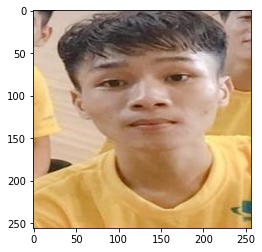

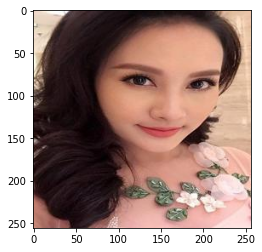

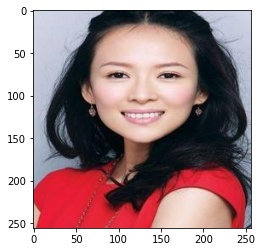

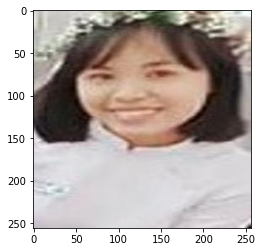

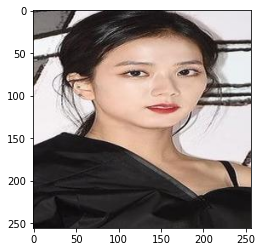

In [83]:
import matplotlib.pyplot as plt
import cv2
for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

# Feature Extraction by Resnet 50

In [84]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from keras.preprocessing import image
model=ResNet50( weights='imagenet',input_shape=(224,224,3))
model_new=Model(model.input,model.layers[-2].output)

In [85]:
def image_preprocessed(input):
    img=image.load_img(input,target_size=(224,224,3))
    img=image.img_to_array(img)
    
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    return img

In [86]:
def feature_extractor(input):
    img=image_preprocessed(input)
    feature_vector=model_new.predict(img)
    feature_vector=feature_vector.reshape(feature_vector.shape[1],)
    return feature_vector

In [87]:
feature_extractor('/content/drive/MyDrive/dataset_images/3242547730179.jpg')


array([0.00856456, 0.9621874 , 0.03094755, ..., 0.59790605, 0.        ,
       0.03551512], dtype=float32)

In [88]:
#image_encoder={}

#for i in range(len(images_code)):
   # img_path='/content/drive/MyDrive/dataset_images/'+images_code[i]
   # image_encoder[images_code[i]]=feature_extractor(img_path)
   ## if i%1000==0:
    # print('successfully encoded images {}'.format(i)
    

In [89]:
import pickle
#try:
  # geeky_file = open('Image_Encoding', 'wb')
  # pickle.dump(image_encoder, geeky_file)
 #  geeky_file.close()
  
#except:
    #print("Something went wrong")

In [90]:
file = open("/content/drive/MyDrive/Data in folder/Image_Encoding (2)",'rb')
image_encoded_data = pickle.load(file)

In [91]:
image_encoded_data.keys()

dict_keys(['25206531893066.jpg', '2522477620757.jpg', '25246164964599.jpg', '2528720793845.jpg', '25300857750989.jpg', '25318339867781.jpg', '25324450247731.jpg', '25326591048585.jpg', '2533407920071.jpg', '25344430965810.jpg', '25333978908986.jpg', '25362819823763.jpg', '25366495508874.jpg', '2538450942557.jpg', '25387632579803.jpg', '25392871297275.jpg', '25396592234424.jpg', '25397438759962.jpg', '25397645358225.jpg', '25410922618672.jpg', '25405752427780.jpg', '25412992960070.jpg', '25429243071221.jpg', '25435377473103.jpg', '25440299302452.jpg', '25445092712223.jpg', '25441434672146.jpg', '25448261466893.jpg', '25472386148260.jpg', '25454016055041.jpg', '25456890540250.jpg', '25480246066195.jpg', '25492039352636.jpg', '25483125972860.jpg', '25500660830870.jpg', '25511173869575.jpg', '25516974402911.jpg', '25525435245812.jpg', '25543698955172.jpg', '25530589794288.jpg', '25571090770325.jpg', '25579956530176.jpg', '25585954134651.jpg', '25586815495082.jpg', '25591117559930.jpg', '25

In [92]:
df.head()

,image1,image2,label
0,53936713158831.jpg,25586815495082.jpg,0
1,96067473455799.jpg,55378374591770.jpg,0
2,19865480214299.jpg,55378374591770.jpg,1
3,51390857433254.jpg,11037978783854.jpg,0
4,27941314137026.jpg,4177070523423.jpg,0


In [93]:
df['image3']=df['image1'].map(image_encoded_data)
df['image4']=df['image2'].map(image_encoded_data)

In [94]:
image_encoded_data['11037978783854.jpg']

array([0.03117663, 0.20131364, 0.15194611, ..., 0.51792264, 0.        ,
       0.30565855], dtype=float32)

In [95]:
df.head()

,image1,image2,label,image3,image4
0,53936713158831.jpg,25586815495082.jpg,0,"[0.0007063321, 0.39970076, 0.013254373, 0.2794...","[0.055255476, 0.074955575, 0.0050417697, 2.321..."
1,96067473455799.jpg,55378374591770.jpg,0,"[0.016765697, 0.21456482, 0.16175348, 0.578579...","[0.09118357, 0.0039291554, 0.0, 0.5589721, 0.1..."
2,19865480214299.jpg,55378374591770.jpg,1,"[0.0, 0.014930876, 0.03219789, 1.8327111, 0.86...","[0.09118357, 0.0039291554, 0.0, 0.5589721, 0.1..."
3,51390857433254.jpg,11037978783854.jpg,0,"[0.17810962, 0.1543016, 0.0, 0.47083437, 1.073...","[0.031176629, 0.20131364, 0.15194611, 0.360023..."
4,27941314137026.jpg,4177070523423.jpg,0,"[0.0, 1.4924372, 0.0, 0.6118699, 0.11292299, 0...","[0.07901007, 0.5870099, 0.041838966, 0.8376603..."


In [96]:
df['image3'][0]

array([0.00070633, 0.39970076, 0.01325437, ..., 0.06779259, 0.04562173,
       0.12089393], dtype=float32)

# Tried using Cosine Similarity

In [97]:
# cosine similarity check:
from sklearn.metrics.pairwise import cosine_similarity

x=cosine_similarity(df['image3'][2].reshape(1,2048),df['image4'][2].reshape(1,2048))
x[0,0]

0.56794095

In [116]:
df.head()

,image1,image2,label,image3,image4,image5
0,53936713158831.jpg,25586815495082.jpg,0,"[0.0007063321, 0.39970076, 0.013254373, 0.2794...","[0.055255476, 0.074955575, 0.0050417697, 2.321...","[0.05596181, 0.47465634, 0.018296143, 2.601167..."
1,96067473455799.jpg,55378374591770.jpg,0,"[0.016765697, 0.21456482, 0.16175348, 0.578579...","[0.09118357, 0.0039291554, 0.0, 0.5589721, 0.1...","[0.10794927, 0.21849397, 0.16175348, 1.1375518..."
2,19865480214299.jpg,55378374591770.jpg,1,"[0.0, 0.014930876, 0.03219789, 1.8327111, 0.86...","[0.09118357, 0.0039291554, 0.0, 0.5589721, 0.1...","[0.09118357, 0.01886003, 0.03219789, 2.391683,..."
3,51390857433254.jpg,11037978783854.jpg,0,"[0.17810962, 0.1543016, 0.0, 0.47083437, 1.073...","[0.031176629, 0.20131364, 0.15194611, 0.360023...","[0.20928624, 0.35561526, 0.15194611, 0.8308575..."
4,27941314137026.jpg,4177070523423.jpg,0,"[0.0, 1.4924372, 0.0, 0.6118699, 0.11292299, 0...","[0.07901007, 0.5870099, 0.041838966, 0.8376603...","[0.07901007, 2.0794473, 0.041838966, 1.4495301..."


# Tried using Manhattan distance

In [121]:
from math import sqrt

#create function to calculate Manhattan distance 
def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))
 
manhattan(df['image3'][0],df['image4'][0])



800.4274169352502

In [125]:
def manhattan_distance(a, b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))

distance=[]
for i in range(df['image3'].shape[0]):
    distance.append(manhattan_distance(df['image3'][i],df['image4'][i]))




In [179]:
df['image5']=(df['image3']+df['image4'])
df.head(10)

,image1,image2,label,image3,image4,image5
0,53936713158831.jpg,25586815495082.jpg,0,"[0.0007063321, 0.39970076, 0.013254373, 0.2794...","[0.055255476, 0.074955575, 0.0050417697, 2.321...","[0.05596181, 0.47465634, 0.018296143, 2.601167..."
1,96067473455799.jpg,55378374591770.jpg,0,"[0.016765697, 0.21456482, 0.16175348, 0.578579...","[0.09118357, 0.0039291554, 0.0, 0.5589721, 0.1...","[0.10794927, 0.21849397, 0.16175348, 1.1375518..."
2,19865480214299.jpg,55378374591770.jpg,1,"[0.0, 0.014930876, 0.03219789, 1.8327111, 0.86...","[0.09118357, 0.0039291554, 0.0, 0.5589721, 0.1...","[0.09118357, 0.01886003, 0.03219789, 2.391683,..."
3,51390857433254.jpg,11037978783854.jpg,0,"[0.17810962, 0.1543016, 0.0, 0.47083437, 1.073...","[0.031176629, 0.20131364, 0.15194611, 0.360023...","[0.20928624, 0.35561526, 0.15194611, 0.8308575..."
4,27941314137026.jpg,4177070523423.jpg,0,"[0.0, 1.4924372, 0.0, 0.6118699, 0.11292299, 0...","[0.07901007, 0.5870099, 0.041838966, 0.8376603...","[0.07901007, 2.0794473, 0.041838966, 1.4495301..."
5,80729456197411.jpg,96583535354942.jpg,0,"[0.03991768, 1.36049, 0.01676174, 0.87970126, ...","[0.22696464, 0.8259898, 0.1406453, 2.5694563, ...","[0.26688233, 2.1864798, 0.15740703, 3.4491577,..."
6,80562072121803.jpg,62916088906019.jpg,0,"[0.124566205, 0.13626532, 0.0, 0.10058997, 1.9...","[0.0, 0.080658935, 0.036197763, 1.0432296, 1.2...","[0.124566205, 0.21692425, 0.036197763, 1.14381..."
7,16392108448786.jpg,64784721487187.jpg,1,"[0.0, 1.1036042, 0.10910813, 0.019679748, 1.58...","[0.0, 0.018186774, 0.2568054, 0.93739825, 0.96...","[0.0, 1.121791, 0.3659135, 0.957078, 2.5540738..."
8,37584528677468.jpg,43577929755669.jpg,1,"[0.1588945, 0.15089841, 0.002000182, 0.1434594...","[0.0, 0.32218373, 0.0, 2.2409115, 0.13590655, ...","[0.1588945, 0.47308213, 0.002000182, 2.384371,..."
9,26415355109282.jpg,49244822983906.jpg,0,"[0.65744483, 0.32975417, 0.031057136, 0.187636...","[0.81858504, 0.20973411, 0.023847954, 0.300837...","[1.4760299, 0.5394883, 0.05490509, 0.48847347,..."


In [99]:
df['image5']

0        [0.05596181, 0.47465634, 0.018296143, 2.601167...
1        [0.10794927, 0.21849397, 0.16175348, 1.1375518...
2        [0.09118357, 0.01886003, 0.03219789, 2.391683,...
3        [0.20928624, 0.35561526, 0.15194611, 0.8308575...
4        [0.07901007, 2.0794473, 0.041838966, 1.4495301...
                               ...                        
23912    [0.5960344, 0.96875024, 0.49758238, 1.2490435,...
23913    [0.6237874, 0.16811827, 0.37476873, 3.9714684,...
23914    [0.636953, 0.27304912, 0.10572781, 2.88263, 1....
23915    [0.110439554, 2.6791515, 0.34306815, 1.3442394...
23916    [0.05838574, 0.46461433, 0.035754614, 1.259491...
Name: image5, Length: 23917, dtype: object

In [100]:
x=df.drop(['image1','image2','image4','image3','label'],axis=1)
y=df['label']
x.head()

,image5
0,"[0.05596181, 0.47465634, 0.018296143, 2.601167..."
1,"[0.10794927, 0.21849397, 0.16175348, 1.1375518..."
2,"[0.09118357, 0.01886003, 0.03219789, 2.391683,..."
3,"[0.20928624, 0.35561526, 0.15194611, 0.8308575..."
4,"[0.07901007, 2.0794473, 0.041838966, 1.4495301..."


In [101]:
x['image5'][0].shape

(2048,)

In [102]:
x1=x['image5'].apply(pd.Series)
x1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.055962,0.474656,0.018296,2.601167,2.716983,0.093572,0.252428,2.181603,0.006700,0.048717,1.192148,0.559925,0.057379,0.139163,0.481312,0.232853,0.000000,0.757791,0.000221,0.351962,0.243395,0.879901,0.730379,0.886363,0.066675,0.096140,0.040196,1.937815,0.000000,0.559483,0.324099,0.196460,0.050997,2.847603,2.776823,0.794157,0.139160,0.988590,1.540593,1.522854,...,0.628879,0.074603,2.390887,0.425155,0.731102,0.371787,0.935484,0.237046,0.514371,0.970242,1.076446,0.074838,0.051120,0.305684,0.494744,0.365940,0.778722,0.636198,0.134593,0.908536,0.069356,0.257304,0.024533,0.032795,0.996478,0.504503,0.781129,0.033235,0.302909,0.734129,2.708397,0.000000,0.268381,10.965680,0.144714,0.449069,0.295373,0.304443,0.196646,0.251564
1,0.107949,0.218494,0.161753,1.137552,2.560972,0.000000,0.870889,0.958383,0.050752,0.090573,0.483280,0.469472,0.540330,0.170255,0.729924,0.177158,0.108879,0.522378,0.156175,0.713769,0.008266,2.527351,0.114164,0.598984,0.079112,0.189035,0.014844,2.568562,0.026023,0.015451,0.119253,0.985014,0.506179,5.943109,2.468739,0.346842,0.201691,1.159036,3.678206,1.812160,...,4.583361,0.383413,1.956067,0.550123,2.460125,0.463194,0.799455,0.095598,1.400922,1.293870,0.109899,1.756984,0.137612,0.729464,0.736248,0.072503,2.297545,0.435879,0.071203,2.456743,0.019789,1.204032,0.802476,0.210818,0.303866,0.133288,3.251601,0.263895,0.378771,0.999927,0.061767,0.052974,0.360573,11.011832,0.760101,0.237973,0.554711,0.272577,0.027506,0.982608
2,0.091184,0.018860,0.032198,2.391683,1.011827,0.011901,2.334889,8.911702,0.156461,0.087342,0.738070,0.582217,0.913830,0.031521,0.309017,0.136580,0.034903,0.387427,0.093232,1.407806,0.056364,1.285250,0.100327,0.351171,0.000000,0.089535,0.073348,1.199702,0.034678,0.050990,0.439338,0.923676,0.158523,7.162291,2.368215,0.509099,0.201691,1.795237,1.850217,1.155343,...,4.010796,0.610301,1.385648,1.342794,1.306314,0.394927,0.631148,0.060174,1.283524,2.359452,0.369225,1.989671,0.202565,0.073340,0.715700,0.000000,1.870867,0.921153,0.147845,0.703567,0.009579,1.583208,1.041249,0.013104,0.160760,0.238223,2.368953,0.196264,0.966492,1.918920,0.229086,0.045513,0.362058,7.962034,0.751247,0.132441,0.733235,0.944079,0.027506,0.523929
3,0.209286,0.355615,0.151946,0.830858,2.042849,0.046813,0.245877,0.501408,0.325652,0.032933,0.187822,0.449436,0.003837,0.000000,0.316696,0.253973,0.042260,0.988401,0.075855,0.046060,0.000000,2.018486,0.044945,1.659180,0.089742,0.029620,0.071924,1.211366,0.026650,0.148558,0.110998,2.478080,0.000000,3.356802,4.792692,0.597389,0.076958,2.380105,0.101228,0.193259,...,2.026389,0.422753,0.999249,0.000000,0.447356,0.000000,0.575692,0.103780,0.592091,0.810353,0.033632,0.749235,1.183511,0.979195,0.250516,0.214507,0.587170,0.311492,0.973319,0.947978,0.000000,1.347137,0.331096,0.010910,0.938336,0.487435,1.798754,0.063102,0.110133,1.295671,0.306603,1.080526,0.014291,8.112635,0.118003,0.056143,0.203585,0.743211,0.008140,0.503838
4,0.079010,2.079447,0.041839,1.449530,0.286071,0.015751,1.243775,0.535260,0.000000,0.472432,0.723058,0.397660,0.880203,0.040339,0.254401,0.094174,0.028411,0.340006,0.118196,0.145183,0.105813,3.651502,0.580410,0.872361,0.233751,0.796636,0.058512,3.009715,1.002198,0.502945,0.432769,1.833397,0.733526,3.797326,4.336236,0.685042,1.697274,1.189560,2.224173,0.313658,...,1.614828,0.030125,0.468433,0.033958,2.100341,0.472762,0.379757,0.112430,0.426061,0.375555,0.288655,0.467379,0.168378,0.780176,1.064818,0.053397,0.972178,2.834778,1.339488,0.900339,0.000000,0.023241,0.441697,0.000000,0.452399,0.662677,0.572593,0.534248,0.297777,1.490581,1.175162,0.105215,0.027644,4.792658,0.518009,0.269646,0.105840,0.527433,0.059101,1.450887


In [103]:
x1.shape

(23917, 2048)

In [104]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.1)

In [106]:
#x_train1=np.concatenate((df['image3'],df['image4']),axis=0).reshape(-1,1))
#x_train1.shape                                                              

## Simple ANN Model Building

In [107]:
model=Sequential()
model.add((Dense(x1.shape[1],activation='relu',input_shape=(1,2048))))
model.add(Dense(4048,activation='relu'))
model.add(Dense(4048,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#model.fit(x_train,y_train,batch_size=216,epochs=30)

In [108]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
4996,0.108210,0.293254,0.000000,1.091344,1.922550,0.063785,0.763442,0.468076,0.104199,0.447106,0.832009,0.580775,0.373291,0.099825,0.083921,0.303224,0.055114,0.079978,0.386483,0.122913,0.063707,3.749451,0.092674,0.557661,0.058711,0.136091,0.160055,1.880916,0.015849,0.105650,0.021968,0.573321,0.321304,4.668235,3.740677,0.312946,0.030380,0.605137,1.548589,0.290722,...,0.729656,0.096297,1.850620,0.898796,1.699557,0.193707,0.968103,0.394515,0.118492,0.570400,0.201222,0.443932,0.070896,0.259441,0.463604,0.000000,0.532109,0.985921,0.607360,0.449272,0.070232,0.000000,0.785665,0.000000,0.226143,0.406962,1.081409,0.912805,0.022136,0.856182,0.123637,0.001559,0.143725,9.812689,0.104166,0.013481,0.329011,0.386259,0.092386,0.182674
22097,0.673123,0.501953,3.124496,0.945802,2.564075,0.716927,0.230322,0.495901,0.000000,0.564042,0.132982,0.223544,1.321249,1.231793,0.855796,0.116127,0.232578,0.523227,0.080535,1.791747,1.867983,3.225350,1.013170,1.164861,0.007452,0.505544,0.128342,1.346575,0.029972,0.781904,0.509275,0.864621,1.387746,1.668160,1.100656,1.230973,0.140686,0.817860,4.128631,0.470309,...,0.165029,0.805414,0.467753,1.256633,0.021028,0.660608,0.044708,0.419918,1.265458,0.632909,0.049782,3.476160,0.018265,0.787923,0.401214,0.187197,0.168332,0.054491,0.077731,3.065113,0.000000,0.200423,1.101742,0.137622,0.408601,0.818434,0.362799,0.220744,0.503006,0.171016,0.289604,0.235104,0.674481,5.157710,0.469229,0.118018,0.153065,2.632510,0.958227,1.122490
22231,0.304318,0.333684,0.263692,2.671944,1.432373,0.000000,0.751295,1.190113,0.432192,0.009542,0.059575,0.374506,0.017161,0.000000,0.480095,0.536538,0.101416,0.404273,0.267307,1.479429,0.373415,3.915063,0.045951,0.706681,2.019025,0.139195,0.056865,1.693008,0.057989,0.298087,0.000000,2.276306,0.235772,3.427107,0.460171,1.073532,0.000000,0.398366,1.095955,0.390547,...,1.440326,0.002849,0.805531,0.337442,1.001846,0.101660,0.200205,0.199074,0.019133,0.629931,0.281747,0.455539,0.407832,0.699021,1.407128,0.026888,1.612866,0.027528,0.029588,1.525772,0.006636,0.305202,0.370301,0.000000,0.265206,1.008110,1.861454,0.090994,0.430618,0.060285,1.509069,0.014892,0.015981,6.602935,0.081804,0.090955,0.338275,0.829786,0.001893,0.349910
3991,0.313993,0.348885,0.282803,0.164100,1.255155,0.000000,1.268730,1.099774,0.011645,0.402574,0.703692,0.604101,0.506081,0.150961,0.212049,0.300362,0.066214,0.010960,0.071554,0.057174,0.076848,4.255855,0.682226,0.300444,0.783078,0.142967,0.046026,2.739141,0.467811,0.027095,0.103316,1.490201,0.394142,5.072112,2.665421,0.137426,0.834490,1.322333,3.227295,0.174882,...,0.732426,0.015603,1.065404,0.506025,1.041702,0.562587,0.980225,0.439091,0.399696,0.766068,0.629548,0.165242,0.318148,0.858220,1.483757,0.005850,1.336995,1.023688,0.766527,0.933460,0.204497,0.219407,0.048081,0.022752,0.387065,0.442542,0.410998,0.020287,0.191030,1.381362,1.000688,0.211062,0.218114,5.155290,0.199668,0.000305,0.488929,0.032705,0.030107,0.684937
18265,0.122757,0.338433,0.120309,1.336894,1.974855,0.086826,0.626143,0.554764,0.020661,0.197734,0.357025,0.060780,0.082459,0.009389,0.108095,1.057101,0.031023,0.101950,0.415913,0.200869,0.032233,0.783587,0.000000,1.540071,0.099493,0.005245,0.160472,0.433513,0.007693,0.170983,0.155185,0.626220,0.010655,2.288235,1.784946,0.249672,0.062261,2.307153,1.857034,0.416451,...,1.850610,0.142745,1.408621,0.000000,0.000000,0.080167,0.243713,0.781340,0.147324,0.579384,0.122824,0.307043,0.430222,0.694454,1.182676,0.204564,0.167502,0.065281,0.017795,0.478267,0.144446,0.097885,1.227160,0.018903,0.621152,0.160345,1.339359,0.103477,0.377651,0.440186,0.260389,1.384622,0.010479,12.465906,0.095319,0.071262,0.307209,0.385606,0.251071,0.547585


# Evaluation on x_test

In [109]:
y_pred=model.predict(x_test)

In [163]:
y_pred

array([[0.6639251 ],
       [0.6480606 ],
       [0.6649457 ],
       ...,
       [0.6802062 ],
       [0.60958576],
       [0.6762941 ]], dtype=float32)

In [167]:
prediction=[]
for i in range(x_test.shape[0]):
    if y_pred[i][0] < 0.5:
        prediction.append(0)
        

    elif y_pred[i][0]>=0.5:
         prediction.append(1)

In [168]:
from sklearn.metrics import accuracy_score
print(accuracy_score(prediction,y_test))

0.5530936454849499


In [111]:
import keras
model1= keras.models.load_model('/content/drive/MyDrive/Anaytics Compi/ann.h5')
 
              

## Prediction on Unseen data

Following same steps of preprocessing as done during training

In [134]:
test=pd.read_csv('/content/drive/MyDrive/test.csv')
test.head()

,image1,image2
0,84770376235978.jpg,70098827925517.jpg
1,51285551988172.jpg,40352160634341.jpg
2,92104157409800.jpg,43993355472481.jpg
3,17278801258247.jpg,39952763632406.jpg
4,69669552075188.jpg,11563244873988.jpg


In [135]:
test['image3']=test['image1'].map(image_encoded_data)
test['image4']=test['image2'].map(image_encoded_data)

In [136]:
test.head()

,image1,image2,image3,image4
0,84770376235978.jpg,70098827925517.jpg,"[0.028789574, 0.21495827, 0.08009385, 0.678644...","[0.040594734, 0.013020431, 0.10583852, 2.15022..."
1,51285551988172.jpg,40352160634341.jpg,"[0.018271869, 0.0006832898, 0.03885294, 2.1099...","[0.1461673, 0.86330557, 0.45195746, 2.6692247,..."
2,92104157409800.jpg,43993355472481.jpg,"[0.039067958, 0.16576594, 0.056265604, 0.51273...","[0.40174878, 0.67793715, 0.0, 1.1738392, 0.469..."
3,17278801258247.jpg,39952763632406.jpg,"[0.0, 1.6375103, 0.53710103, 0.34190026, 0.353...","[0.23165858, 0.24723162, 0.09476315, 0.4461118..."
4,69669552075188.jpg,11563244873988.jpg,"[0.0, 2.2269523, 0.0, 1.0583261, 0.011978162, ...","[0.0, 0.12470865, 0.0043355585, 0.19209695, 1...."


In [138]:
test['image5']=test['image3']+test['image4']
test.head()

,image1,image2,image3,image4,image5
0,84770376235978.jpg,70098827925517.jpg,"[0.028789574, 0.21495827, 0.08009385, 0.678644...","[0.040594734, 0.013020431, 0.10583852, 2.15022...","[0.06938431, 0.22797869, 0.18593237, 2.8288746..."
1,51285551988172.jpg,40352160634341.jpg,"[0.018271869, 0.0006832898, 0.03885294, 2.1099...","[0.1461673, 0.86330557, 0.45195746, 2.6692247,...","[0.16443916, 0.8639889, 0.4908104, 4.7791758, ..."
2,92104157409800.jpg,43993355472481.jpg,"[0.039067958, 0.16576594, 0.056265604, 0.51273...","[0.40174878, 0.67793715, 0.0, 1.1738392, 0.469...","[0.44081673, 0.8437031, 0.056265604, 1.6865735..."
3,17278801258247.jpg,39952763632406.jpg,"[0.0, 1.6375103, 0.53710103, 0.34190026, 0.353...","[0.23165858, 0.24723162, 0.09476315, 0.4461118...","[0.23165858, 1.8847419, 0.6318642, 0.788012, 1..."
4,69669552075188.jpg,11563244873988.jpg,"[0.0, 2.2269523, 0.0, 1.0583261, 0.011978162, ...","[0.0, 0.12470865, 0.0043355585, 0.19209695, 1....","[0.0, 2.351661, 0.0043355585, 1.2504231, 1.396..."


In [140]:
x2=test['image5'].apply(pd.Series)
x2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.069384,0.227979,0.185932,2.828875,1.328909,0.081829,1.462413,0.670836,0.017586,0.434329,0.429896,0.205564,1.981320,0.001424,0.344420,0.672287,0.115057,0.252961,0.007112,0.787655,0.161485,1.006933,0.575863,0.859160,0.003264,0.079225,0.123518,0.834866,0.188024,0.342486,0.160448,1.302761,0.298408,3.667500,0.291926,0.406892,0.258126,0.374837,3.752850,0.807677,...,0.986046,0.342196,2.279016,0.000000,0.711248,0.249693,0.557727,0.179141,0.751098,0.556769,0.096433,0.172417,0.480861,0.237573,1.692399,0.634747,0.093119,0.367114,0.189949,0.778341,0.247122,0.429823,0.353622,0.003457,0.139872,0.824400,2.207516,0.014025,0.141533,0.741338,1.113317,0.336544,0.461414,7.860425,0.348819,0.000000,0.488716,0.351725,0.540006,0.209782
1,0.164439,0.863989,0.490810,4.779176,0.676331,0.051660,1.657027,0.380210,0.139596,0.622228,1.450687,0.868090,1.899210,0.314523,0.029424,0.180258,0.060689,0.234641,0.287364,0.390584,0.212119,3.758990,0.107156,0.108016,2.412708,0.475707,0.020825,2.377878,0.554431,0.391517,0.356634,0.057328,0.706618,5.856388,0.620524,0.425018,0.069246,0.584009,3.337959,0.497291,...,0.349138,0.055410,0.984086,0.072583,1.038938,0.051274,0.978845,0.077037,0.065528,0.342401,0.281151,0.071603,0.026434,0.510620,1.581444,0.359905,1.847948,1.799284,0.468278,0.327513,1.660547,0.382694,0.826644,0.053763,0.099283,1.730917,1.685569,0.269350,0.987197,1.234589,1.710676,0.042328,0.001492,4.992508,0.138608,0.239243,0.385334,0.449086,0.407762,2.093231
2,0.440817,0.843703,0.056266,1.686574,0.657295,0.089611,0.389940,0.699738,0.041823,0.401706,0.166339,0.367486,0.275070,0.096204,0.148461,0.088477,0.005977,0.131427,0.000000,0.363305,0.386654,1.875508,0.374196,0.869709,0.077694,0.120924,0.036673,0.268308,0.034601,0.202442,0.000000,0.332880,0.000000,5.301872,1.188326,0.265286,0.008085,1.669017,2.661293,0.017214,...,0.635427,0.568595,1.428668,0.995995,0.445403,0.080913,0.215439,0.025911,0.553855,0.252022,0.078235,0.248132,0.389034,0.480511,0.356500,0.679337,0.609482,0.201137,0.102928,1.123153,0.138367,0.141247,0.212849,0.023543,0.562008,0.582965,0.577011,0.007202,0.042502,0.160445,0.545844,0.657372,0.092641,5.255279,0.011755,0.004694,0.115826,0.319562,0.085041,0.241735
3,0.231659,1.884742,0.631864,0.788012,1.970060,0.000000,0.337009,0.168264,0.047950,0.463392,0.581146,0.421210,0.145079,0.294297,0.144879,0.738489,0.047188,0.279598,0.055653,0.450010,0.832130,6.811451,0.235465,0.712714,2.042972,0.097718,0.112025,0.345603,0.330791,0.160767,0.234230,0.235044,0.077927,6.339900,0.622032,2.081204,0.748873,0.716577,1.482144,0.068680,...,0.824613,0.957200,1.295336,0.822777,0.075610,0.171546,0.092265,0.146443,0.181933,1.752827,0.244513,0.451474,0.034442,0.988261,1.952652,0.152611,0.792082,1.086417,0.414898,0.478318,0.122182,0.094106,0.514359,0.000000,0.041589,0.246882,0.416187,0.409443,0.222721,0.648119,1.768480,0.319726,0.595940,8.804177,0.094844,0.000000,0.434954,0.479168,0.209105,0.490114
4,0.000000,2.351661,0.004336,1.250423,1.396721,0.352966,2.090893,1.316613,0.087578,0.281938,1.757818,0.272982,0.535700,0.122880,0.163827,0.448459,0.000142,0.425614,0.460502,1.078446,0.175039,6.088434,0.650227,1.287881,0.177760,0.453192,0.158917,4.915282,0.095133,0.446563,0.000000,0.642330,0.314836,2.642368,3.925510,2.156428,1.088430,1.583384,4.189034,0.475413,...,0.308748,0.052913,1.754355,0.797303,3.895295,0.260463,0.385983,0.130946,0.252093,1.253603,0.210075,0.194804,0.303581,0.336913,0.494513,0.247029,1.512399,2.389205,0.964246,0.419137,0.052810,0.208891,0.996277,0.012917,0.147466,0.226999,1.070128,0.412215,0.055201,1.395276,1.836218,0.640635,0.072215,3.085355,0.000000,0.025498,0.890397,0.285335,0.013075,0.991776


In [141]:
x2.shape

(4997, 2048)

In [144]:
y_prediction=model1.predict(x2)


In [158]:
y_prediction[2][0]

0.8479608

In [148]:
y_prediction.shape

(4997, 1)

In [161]:
original_prediction=[]
for i in range(y_prediction.shape[0]):
    if y_prediction[i][0] < 0.5:
        original_prediction.append(0)
        

    elif y_prediction[i][0]>=0.5:
         original_prediction.append(1)


In [178]:
dataframe=pd.DataFrame(original_prediction,columns=['Predicted Classes'])
dataframe.head(10)


,Predicted Classes
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [180]:
dataframe.to_csv('prediction_on_test_file.csv')